In [1]:
import numpy as np
from numpy.random import normal, uniform
from scipy.stats import multivariate_normal as mv_norm
import matplotlib.pyplot as plt

In [27]:
class BayesianLinearRegression(object):
    def __init__(self,prior_means, prior_cov, noise):
        self.prior_means = prior_means
        self.prior_cov = prior_cov
        self.noise = noise
        self.prior = mv_norm(mean = prior_means, cov = prior_cov)
        self.posterior = self.prior
    def basis(self, x):
        ##Currently only supports radial basis functions.
        s = self.noise
        return np.append(1, np.exp(-(x - np.arange(s, 2*s, s)) ** 2 / (2 * s * s)))
    
    def build_phi(self,X):
        phi = np.ones((len(X), 2))
        phi[:, 1] = X
        return phi
    
    
    
    def infer_posterior(self,X,T):    
        #making sure it is a column vector
        T = T.reshape(T.shape + (1,))
        #PHI = self.build_phi(X)
        PHI = self.build_phi(X)
        self.posterior_cov = np.linalg.inv(np.linalg.inv(self.prior_cov) + self.noise*PHI.T.dot(PHI))
        self.posterior_mean = self.noise*(self.posterior_cov.dot(PHI.T.dot(T)))
        self.posterior = mv_norm(mean=self.posterior_mean.flatten(), cov=self.posterior_cov)
        
    def make_scatter(self, X, T, line, samples=None):
        plt.scatter(X, T, alpha=0.5)
        plt.xlabel('x')
        plt.ylabel('t')
        plt.plot([-1, 1], generate_real(np.array([-1., 1.]), 0, line[0], line[1]), 'r')
        _ = plt.title('Real Data from Noisey Linear Function')
        
        if samples:
            weights = self.posterior.rvs(samples)
            print(weights)
            for weight in weights: 
                plt.plot([-1, 1], generate_real(np.array([-1., 1.]),0,weight[0], weight[1]), 'black')
                _ = plt.title('Lines Sampled from Posterior Distribution vs Real Line and Data')

In [28]:
def generate_real(X, noise, a, b):
    #a, b = uniform(0,5,2)
    data = a*X + b + normal(0,noise,len(X))
    return data

In [29]:
np.random.seed(20)
X = uniform(-1, 1, 1000)
a, b = uniform(0,5,2)
T = generate_real(X,2,a,b)

In [30]:
#Priors with 0 mean and constant variance 0.1.
sigma = 0.1
BLR = BayesianLinearRegression([0]*2,sigma*np.eye(2),sigma)

In [31]:
BLR.infer_posterior(X[:1000],T[:1000])

[[2.74873454 2.69099131]
 [2.52334831 2.93753221]
 [2.69063578 2.90979054]
 [2.7440286  2.74121491]
 [2.74562287 3.01893127]]


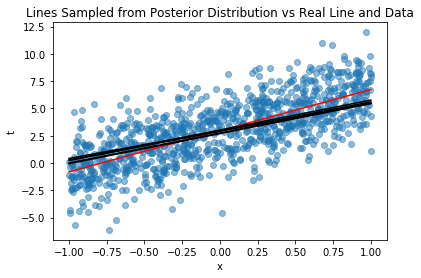

In [32]:
BLR.make_scatter(X[:1000],T[:1000],[a,b],5)